## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/query_output_processing.csv


originated_ip   uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x2  CS2M5A4jWOzWlDLA96                    SF   
1  192.168.10.25  0x43  Cu4XYm4M2XPMFhQZ06                    SF   
2  192.168.10.25  0x48  CbGOjc4DTlzcopdTb9                    SF   
3  192.168.10.25  0x50   CkB0VCG6QbrdYjit8                    SF   
4  192.168.10.25  0x68  CKMqf41v60RDSWgXA5                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.076309                   1244                      5216   
1             0.174723                     88                      2072   
2             0.166391                    689                      1273   
3             0.342474                   1701                      3117   
4             0.329420                    871                      2027   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              61614                    52              tcp  ...   
1              61661                    36              tcp  ...   
2              60865                    11              tcp  ...   
3              60872                    27              tcp  ...   
4              61467                    22              tcp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No           Yes  
1              No           Yes  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25       0x2  CS2M5A4jWOzWlDLA96                    SF   
1      192.168.10.25      0x43  Cu4XYm4M2XPMFhQZ06                    SF   
2      192.168.10.25      0x48  CbGOjc4DTlzcopdTb9                    SF   
3      192.168.10.25      0x50   CkB0VCG6QbrdYjit8                    SF   
4      192.168.10.25      0x68  CKMqf41v60RDSWgXA5                    SF   
...              ...       ...                 ...                   ...   
18597     172.16.0.1  0x2f50cb  CT5Ppt2fgcTMqvaXHk                    SF   
18598     172.16.0.1  0x2f50d6  CX10av3LxLdeCOExm7                    SF   
18599     172.16.0.1  0x2f50e8   CBfaGnh9ezPzWdTs6                    SF   
18600     172.16.0.1  0x2f50ed  CecXjL1Dz3mvy4lvlj                    SF   
18601     172.16.0.1  0x2f5105  C3Kkm44LkQ8Nddn2Pd                    SF   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 0.076309                   1244                      5216   
1                 0.174723                     88                      2072   
2                 0.166391                    689                      1273   
3                 0.342474                   1701                      3117   
4                 0.329420                    871                      2027   
...                    ...                    ...                       ...   
18597            12.152959                   2008                      3160   
18598            12.418594                   2008                      3160   
18599            12.323265                   2008                      3160   
18600            10.684517                   2008                      3160   
18601            11.911964                   2008                      3160   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  61614                    52              tcp   
1                  61661                    36              tcp   
2                  60865                    11              tcp   
3                  60872                    27              tcp   
4                  61467                    22              tcp   
...                  ...                   ...              ...   
18597              51020                    22              tcp   
18598              51028                    22              tcp   
18599              51052                    22              tcp   
18600              51068                    22              tcp   
18601              51142                    22              tcp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                       1594                      4868                139   
1                        219                      1910                 21   
2                       1343                      1663                443   
3                      49390                     51530                443   
4                      42347                     43967                443   
...                      ...                       ...                ...   
18597                   2745                      4469                 22   
18598                   2745                      4469                 22   
18599                   2745                      4469                 22   
18600                   2745                      4469                 22   
18601                   2745                      4469                 22   

       connection.resp_pkts  connection.service                connection.ts  \
0                        32  smb,gssapi,dce_rpc  2017-07-04T18:08:16.759946Z   
1                        28                 ftp  2017-07-04T18:10:38.812648Z   
2                         6                 ssl  2017-07-04T17:49:59.530842Z   
3                        41                 ssl  2017-07-04T17:50:00.652192Z   
4              

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     17228
Yes     1374
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.073863
1    No              0.926137

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

<AxesSubplot:xlabel='Class'>

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
connection.orig_bytes                            0
connection.orig_ip_bytes                         0
connection.orig_p                                0
connection.orig_pkts                             0
connection.proto                                 0
connection.resp_bytes                            0
connection.resp_ip_bytes                         0
connection.resp_p                                0
connection.resp_pkts                             0
connection.service                               0
connection.ts                                    0
responded_ip                                     0
dns_count                                        0
ssh_count                                        0
http_count                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
2090     185.49.84.72  0x1b7df0  CBWOJ62d6ZgRM5K806                   OTH   
12995  123.130.127.12   0x188e2  Cmpbq22UeQGKPeLBlf                   OTH   
12996  63.241.108.104   0xaaed0   CC1oFEcyjLqH995p6                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
2090             45.265831                    456                       708   
12995            58.436178                    608                       944   
12996             2.999245                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
2090                   3                     9             icmp   
12995                  3                    12             icmp   
12996                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
2090                       0                         0                 10   
12995                      0                         0                 10   
12996                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
2090                      0               none  2017-07-04T18:04:08.230888Z   
12995                     0               none  2017-07-04T17:45:38.597906Z   
12996                     0               none  2017-07-04T17:45:47.693769Z   

        responded_ip  dns_count  ssh_count  http_count  ssl_count  \
2090   192.168.10.14          0          0           0          0   
12995  192.168.10.15          0          0           0          0   
12996   192.168.10.8          0          0           0          0   

       files_count dns_qtype dns_rcode ssh_auth_attempts ssh_host_key  \
2090             0       NaN       NaN               NaN          NaN   
12995            0       NaN       NaN               NaN          NaN   
12996            0       NaN       NaN               NaN          NaN   

      http_method http_status_code http_user_agent ssl_version ssl_cipher  \
2090          NaN              NaN             NaN         NaN        NaN   
12995         NaN              NaN             NaN         NaN        NaN   
12996         NaN              NaN             NaN         NaN        NaN   

      ssl_curve ssl_validation_status files_source file_md5 dns_dicts  \
2090        NaN                   NaN          NaN      NaN       NaN   
12995       NaN                   NaN          NaN      NaN       NaN   
12996       NaN                   NaN          NaN      NaN       NaN   

      ssh_dicts http_dicts ssl_dicts files_dicts  \
2090        NaN        NaN       NaN         NaN   
12995       NaN        NaN       NaN         NaN   
12996       NaN        NaN       NaN         NaN   

                        connection.time  orig_orig_total  \
2090   2017-07-04 18:04:08.230888+00:00                1   
12995  2017-07-04 17:45:38.597906+00:00                1   
12996  2017-07-04 17:45:47.693769+00:00                1   

       orig_orig_proto_tcp_count  orig_orig_proto_udp_count  \
2090                           0                          0   
12995                          0                          0   
12996                          0                          0   

       orig_orig_proto_icmp_count orig_orig_connection.protocol_mode  \
2090                            1                               icmp   
12995                           1                               icmp   
12996                           1                               icmp   

      orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
2090                               none                                  OTH   
12995                              none                                  OTH   
12996                              none                                  OTH   

  

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   18602
unique                                   2105
top       2017-07-04 17:45:32.184444672+00:00
freq                                      696
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip   uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x2  CS2M5A4jWOzWlDLA96                    SF   
1  192.168.10.25  0x43  Cu4XYm4M2XPMFhQZ06                    SF   
2  192.168.10.25  0x48  CbGOjc4DTlzcopdTb9                    SF   
3  192.168.10.25  0x50   CkB0VCG6QbrdYjit8                    SF   
4  192.168.10.25  0x68  CKMqf41v60RDSWgXA5                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.076309                   1244                      5216   
1             0.174723                     88                      2072   
2             0.166391                    689                      1273   
3             0.342474                   1701                      3117   
4             0.329420                    871                      2027   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              61614                    52              tcp   
1              61661                    36              tcp   
2              60865                    11              tcp   
3              60872                    27              tcp   
4              61467                    22              tcp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                   1594                      4868                139   
1                    219                      1910                 21   
2                   1343                      1663                443   
3                  49390                     51530                443   
4                  42347                     43967                443   

   connection.resp_pkts  connection.service                connection.ts  \
0                    32  smb,gssapi,dce_rpc  2017-07-04T18:08:16.759946Z   
1                    28                 ftp  2017-07-04T18:10:38.812648Z   
2                     6                 ssl  2017-07-04T17:49:59.530842Z   
3                    41                 ssl  2017-07-04T17:50:00.652192Z   
4                    31                 ssl  2017-07-04T18:01:19.250643Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0   192.168.10.50          0          0           0          0            0   
1   192.168.10.50          0          0           0          0            0   
2  172.217.10.102          0          0           0          1            0   
3   172.217.11.46          0          0           0          1            0   
4   52.84.145.117          0          0           0          1            4   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3        []        []                []           []          []   
4        []        []                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []          []   
1               []              []          []   
2               []              []  ['TLSv10']   
3               []              []  ['TLSv10']   
4               []              []  ['TLSv10']   

                         ssl_cipher ssl_curve ssl_validation_status  \
0                                []        []                    []   
1                                []        []                    []   
2  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
3  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
4  ['TLS_RSA_WITH_AES_256_CBC_SHA']    [None]                [None]   

  files_source                                           file_md5 dns_dicts  \
0           []                                                 []        []   
1           []                                                 []        []   
2           []     

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip    responded_ip  connection.time  \
0  CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1  Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2  CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3   CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4  CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.076309              61614                   1244   
1             0.174723              61661                     88   
2             0.166391              60865                    689   
3             0.342474              60872                   1701   
4             0.329420              61467                    871   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      5216                    52                139   
1                      2072                    36                 21   
2                      1273                    11                443   
3                      3117                    27                443   
4                      2027                    22                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   1594                      4868                    32   
1                    219                      1910                    28   
2                   1343                      1663                     6   
3                  49390                     51530                    41   
4                  42347                     43967                    31   

  connection.proto  connection.service connection.conn_state  dns_count  \
0              tcp  smb,gssapi,dce_rpc                    SF          0   
1              tcp                 ftp                    SF          0   
2              tcp                 ssl                    SF          0   
3              tcp                 ssl                    SF          0   
4              tcp                 ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              425   
1          0           0          0            0              436   
2          0           0          1            0             1237   
3          0           0          1            0             1237   
4          0           0          1            4              386   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499192e+09                            8.182632   
1                    1.499192e+09                            7.405625   
2                    1.499191e+09                            5.585614   
3                    1.499191e+09                            5.585614   
4                    1.499191e+09                            9.490432   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            14.687059                            710.689412   
1                            14.121560                            690.022936   
2                            11.565077                            721.008084   
3                            11.565077                            721.008084   
4                            14.935233                            670.994819   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          29668.691765                            23.621176   
1                          27615.348624                            22.245413   
2                          15581.882781                            14.210186   
3                          15581.882781                            14.210186   
4                          31102.443005                            24.466321   

  

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip    responded_ip  connection.time  \
0  CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1  Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2  CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3   CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4  CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.076309              61614                   1244   
1             0.174723              61661                     88   
2             0.166391              60865                    689   
3             0.342474              60872                   1701   
4             0.329420              61467                    871   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      5216                    52                139   
1                      2072                    36                 21   
2                      1273                    11                443   
3                      3117                    27                443   
4                      2027                    22                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   1594                      4868                    32   
1                    219                      1910                    28   
2                   1343                      1663                     6   
3                  49390                     51530                    41   
4                  42347                     43967                    31   

  connection.proto  connection.service connection.conn_state  dns_count  \
0              tcp  smb,gssapi,dce_rpc                    SF          0   
1              tcp                 ftp                    SF          0   
2              tcp                 ssl                    SF          0   
3              tcp                 ssl                    SF          0   
4              tcp                 ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              425   
1          0           0          0            0              436   
2          0           0          1            0             1237   
3          0           0          1            0             1237   
4          0           0          1            4              386   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499192e+09                            8.182632   
1                    1.499192e+09                            7.405625   
2                    1.499191e+09                            5.585614   
3                    1.499191e+09                            5.585614   
4                    1.499191e+09                            9.490432   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            14.687059                            710.689412   
1                            14.121560                            690.022936   
2                            11.565077                            721.008084   
3                            11.565077                            721.008084   
4                            14.935233                            670.994819   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          29668.691765                            23.621176   
1                          27615.348624                            22.245413   
2                          15581.882781                            14.210186   
3                          15581.882781                            14.210186   
4                          31102.443005                            24.466321   

  

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/ohe_proto_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_http', 'connection.service_krb',
       'connection.service_krb_tcp', 'connection.service_none',
       'connection.service_ntp', 'connection.service_smb',
       'connection.service_smb,gssapi,dce_rpc',
       'connection.service_smb,krb,gssapi',
       'connection.service_smb,ntlm,gssapi', 'connection.service_ssh',
       'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/ohe_service_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S3',
       'connection.conn_state_SF', 'connection.conn_state_SH',
       'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssh',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_REJ',
       'orig_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_icmp',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh',
       'orig_resp_connection.service_mode_ssl'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_OTH',
       'orig_resp_connection.conn_state_mode_RSTO',
       'orig_resp_connection.conn_state_mode_RSTR',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tues

In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_tcp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none',
       'resp_orig_connection.service_mode_ssh'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_REJ',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_icmp',
       'resp_resp_connection.protocol_mode_tcp',
       'resp_resp_connection.protocol_mode_udp'],
      dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connec

In [32]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ntp', 'orig_orig_connection.service_mode_ssh', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_REJ', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_icmp', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.service_mode_ssl', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_OTH', 'orig_resp_connection.conn_

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     1.860200e+04         18602.000000       18602.000000   
mean      1.499191e+09            14.312244       49531.840555   
std       5.565623e+02            44.047948       17066.605594   
min       1.499190e+09             0.000000           3.000000   
25%       1.499191e+09             0.023413       47980.000000   
50%       1.499191e+09             0.074782       56285.500000   
75%       1.499192e+09             5.114000       60897.000000   
max       1.499192e+09          1681.074179       65530.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           18602.000000              18602.000000          18602.000000   
mean              682.157671               1174.964359              9.595366   
std              2074.875204               3444.094328             30.912003   
min                 0.000000                  0.000000              0.000000   
25%                57.000000                112.000000              2.000000   
50%                84.000000                144.000000              2.000000   
75%               741.000000               1384.000000             12.000000   
max             99896.000000             144676.000000           1480.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       18602.000000           1.860200e+04              1.860200e+04   
mean          239.684174           8.493348e+03              9.067171e+03   
std          1901.119984           7.332911e+04              7.515971e+04   
min             3.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.180000e+02              1.650000e+02   
50%            53.000000           2.120000e+02              2.800000e+02   
75%           137.000000           2.745000e+03              4.012750e+03   
max         63335.000000           3.458950e+06              3.525162e+06   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          18602.000000  18602.000000  18602.000000  18602.000000   
mean              11.313085      0.561069      0.071121      0.066875   
std               43.598065      0.496270      0.257034      0.249811   
min                0.000000      0.000000      0.000000      0.000000   
25%                2.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%               10.000000      1.000000      0.000000      0.000000   
max             2079.000000      1.000000      1.000000      1.000000   

          ssl_count  files_count  orig_orig_total  \
count  18602.000000  18602.00000     18602.000000   
mean       0.204333      0.50801       660.012794   
std        0.403224      1.34695       424.265908   
min        0.000000      0.00000         1.000000   
25%        0.000000      0.00000       300.000000   
50%        0.000000      0.00000       528.000000   
75%        0.000000      0.00000       991.000000   
max        1.000000     32.00000      1535.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    1.860200e+04                        18602.000000   
mean                     1.499191e+09                           14.134090   
std                      5.384531e+02                           11.076398   
min                      1.499190e+09                            0.114356   
25%                      1.499191e+09                            3.742832   
50%                      1.499191e+09                           13.874324   
75%                      1.499192e+09                           23.321637   
max                      1.499192e+09                           58.436178   

       orig_orig_connection.orig_pkts_mean  \
count                         18602.000000   
mean                              9.515411   
std                          

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.266173          0.537259         1.021605   
1               0.266173          0.537259         1.276845   
2               0.266173          0.174303        -0.949887   
3               0.266173          0.174304        -0.947873   
4               0.266173         -2.033957         0.271428   
...                  ...               ...              ...   
18597          -3.632623          0.537259        -0.143672   
18598          -3.632623          0.537259        -0.132790   
18599          -3.632623          0.537259        -0.103505   
18600          -3.632623          0.537259        -0.090448   
18601          -3.632623          0.537259        -0.013331   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.323200           0.707961               0.270791   
1                -0.320966           0.710715              -0.286366   
2                -0.321155           0.664073               0.003298   
3                -0.317158           0.664483               0.491051   
4                -0.317454           0.699347               0.091016   
...                    ...                ...                    ...   
18597            -0.049023           0.087199               0.639016   
18598            -0.042992           0.087668               0.639016   
18599            -0.045156           0.089075               0.639016   
18600            -0.082361           0.090012               0.639016   
18601            -0.054494           0.094348               0.639016   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1.173355              1.371822          -0.052962   
1                      0.260463              0.854210          -0.115032   
2                      0.028466              0.045441           0.106948   
3                      0.563889              0.563053           0.106948   
4                      0.247397              0.401299           0.106948   
...                         ...                   ...                ...   
18597                  0.576375              0.401299          -0.114506   
18598                  0.576375              0.401299          -0.114506   
18599                  0.576375              0.401299          -0.114506   
18600                  0.576375              0.401299          -0.114506   
18601                  0.576375              0.401299          -0.114506   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.094090                 -0.055871              0.474504   
1                  -0.112842                 -0.095229              0.382755   
2                  -0.097513                 -0.098515             -0.121868   
3                   0.557729                  0.564983              0.680941   
4                   0.461680                  0.464355              0.451567   
...                      ...                       ...                   ...   
18597              -0.078393                 -0.061180              0.497442   
18598              -0.078393                 -0.061180              0.497442   
18599              -0.078393                 -0.061180              0.497442   
18600              -0.078393                 -0.061180              0.497442   
18601              -0.078393                 -0.061180              0.497442   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.130602  -0.276707   -0.267707  -0.506761    -0.377166   
1      -1.130602  -0.276707   -0.267707  -0.506761    -0.377166   
2      -1.130602  -0.276707   -0.267707   1.973316    -0.377166   
3      -1.130602  -0.276707   -0.267707   1.973316    -0.377166   
4      -1.130602  -0.276707   -0.267707   1.973316     2.592587   
...          ...        ...         ...        ...          ...   
18597  -1.130602   3.613927   -0.267707  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2         3         4         5         6    \
0      1.000000  0.856854  0.776106  0.000045  0.940238  0.012453  0.036053   
1      1.000000  0.856854  0.855039  0.000104  0.940956  0.000881  0.014322   
2      1.000000  0.766389  0.166415  0.000099  0.928808  0.006897  0.008799   
3      1.000000  0.766389  0.167038  0.000204  0.928915  0.017028  0.021545   
4      1.000000  0.215988  0.544111  0.000196  0.937995  0.008719  0.014011   
...         ...       ...       ...       ...       ...       ...       ...   
18597  0.840002  0.856854  0.415740  0.007229  0.778565  0.020101  0.021842   
18598  0.840002  0.856854  0.419105  0.007387  0.778687  0.020101  0.021842   
18599  0.840002  0.856854  0.428162  0.007331  0.779053  0.020101  0.021842   
18600  0.840002  0.856854  0.432200  0.006356  0.779297  0.020101  0.021842   
18601  0.840002  0.856854  0.456048  0.007086  0.780426  0.020101  0.021842   

            7         8         9         10        11   12   13   14   15   \
0      0.035135  0.002147  0.000461  0.001381  0.015392  0.0  0.0  0.0  0.0   
1      0.024324  0.000284  0.000063  0.000542  0.013468  0.0  0.0  0.0  0.0   
2      0.007432  0.006948  0.000388  0.000472  0.002886  0.0  0.0  0.0  1.0   
3      0.018243  0.006948  0.014279  0.014618  0.019721  0.0  0.0  0.0  1.0   
4      0.014865  0.006948  0.012243  0.012472  0.014911  0.0  0.0  0.0  1.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
18597  0.014865  0.000300  0.000794  0.001268  0.015873  0.0  1.0  0.0  0.0   
18598  0.014865  0.000300  0.000794  0.001268  0.015873  0.0  1.0  0.0  0.0   
18599  0.014865  0.000300  0.000794  0.001268  0.015873  0.0  1.0  0.0  0.0   
18600  0.014865  0.000300  0.000794  0.001268  0.015873  0.0  1.0  0.0  0.0   
18601  0.014865  0.000300  0.000794  0.001268  0.015873  0.0  1.0  0.0  0.0   

         16        17        18        19        20        21        22   \
0      0.000  0.276402  0.816466  0.138341  0.439706  0.296501  0.440899   
1      0.000  0.283572  0.869122  0.125018  0.421435  0.287134  0.410385   
2      0.000  0.805737  0.165264  0.093812  0.338837  0.301178  0.231558   
3      0.000  0.805737  0.165264  0.093812  0.338837  0.301178  0.231558   
4      0.125  0.250978  0.532887  0.160764  0.447725  0.278510  0.462205   
...      ...       ...       ...       ...       ...       ...       ...   
18597  0.000  0.310952  0.409958  0.208433  0.673550  0.878596  0.040622   
18598  0.000  0.310300  0.413196  0.208577  0.673544  0.878614  0.040622   
18599  0.000  0.307692  0.421860  0.209153  0.673865  0.878564  0.040620   
18600  0.000  0.310300  0.427679  0.209348  0.674290  0.878614  0.040622   
18601  0.000  0.305737  0.452744  0.209566  0.675570  0.878526  0.040619   

            23        24        25        26        27        28        29   \
0      0.614449  0.148515  0.269206  0.666667  0.000000  0.047619  0.048276   
1      0.578662  0.148515  0.276428  0.666667  0.000000  0.051948  0.044828   
2      0.369644  0.148515  0.802364  0.666667  0.000000  0.133478  1.000000   
3      0.369644  0.148515  0.802364  0.666667  0.000000  0.133478  1.000000   
4      0.636433  0.158416  0.242942  0.666667  0.000000  0.036075  0.010345   
...         ...       ...       ...       ...       ...       ...       ...   
18597  0.848621  0.000000  0.313854  0.000000  0.948413  0.000000  0.000000   
18598  0.848601  0.000000  0.313198  0.000000  0.946429  0.000000  0.000000   
18599  0.848793  0.000000  0.310571  0.000000  0.938492  0.000000  0.000000   
18600  0.849201  0.000000  0.313198  0.000000  0.946429  0.000000  0.000000   
18601  0.849119  0.000000  0.308601  0.000000  0.932540  0.000000  0.000000   

            30        31   32        33        34   35        36        37   \
0      0.093750  0.419890  0.0  0.793103  0.777778  0.0  0.183529  0.000000   
1      0.093750  0.426796  0.0  0.862069  0.666667  0.0  0.197248  0.000000   
2      0.093750

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.856854         0.776106   
1               1.000000          0.856854         0.855039   
2               1.000000          0.766389         0.166415   
3               1.000000          0.766389         0.167038   
4               1.000000          0.215988         0.544111   
...                  ...               ...              ...   
18597           0.840002          0.856854         0.415740   
18598           0.840002          0.856854         0.419105   
18599           0.840002          0.856854         0.428162   
18600           0.840002          0.856854         0.432200   
18601           0.840002          0.856854         0.456048   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000045           0.940238               0.012453   
1                 0.000104           0.940956               0.000881   
2                 0.000099           0.928808               0.006897   
3                 0.000204           0.928915               0.017028   
4                 0.000196           0.937995               0.008719   
...                    ...                ...                    ...   
18597             0.007229           0.778565               0.020101   
18598             0.007387           0.778687               0.020101   
18599             0.007331           0.779053               0.020101   
18600             0.006356           0.779297               0.020101   
18601             0.007086           0.780426               0.020101   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.036053              0.035135           0.002147   
1                      0.014322              0.024324           0.000284   
2                      0.008799              0.007432           0.006948   
3                      0.021545              0.018243           0.006948   
4                      0.014011              0.014865           0.006948   
...                         ...                   ...                ...   
18597                  0.021842              0.014865           0.000300   
18598                  0.021842              0.014865           0.000300   
18599                  0.021842              0.014865           0.000300   
18600                  0.021842              0.014865           0.000300   
18601                  0.021842              0.014865           0.000300   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000461                  0.001381              0.015392   
1                   0.000063                  0.000542              0.013468   
2                   0.000388                  0.000472              0.002886   
3                   0.014279                  0.014618              0.019721   
4                   0.012243                  0.012472              0.014911   
...                      ...                       ...                   ...   
18597               0.000794                  0.001268              0.015873   
18598               0.000794                  0.001268              0.015873   
18599               0.000794                  0.001268              0.015873   
18600               0.000794                  0.001268              0.015873   
18601               0.000794                  0.001268              0.015873   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0        0.000   
1            0.0        0.0         0.0        0.0        0.000   
2            0.0        0.0         0.0        1.0        0.000   
3            0.0        0.0         0.0        1.0        0.000   
4            0.0        0.0         0.0        1.0        0.125   
...          ...        ...         ...        ...          ...   
18597        0.0        1.0         0.0   

In [41]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.076309              61614                   1244   
1                 0.174723              61661                     88   
2                 0.166391              60865                    689   
3                 0.342474              60872                   1701   
4                 0.329420              61467                    871   
...                    ...                ...                    ...   
18597            12.152959              51020                   2008   
18598            12.418594              51028                   2008   
18599            12.323265              51052                   2008   
18600            10.684517              51068                   2008   
18601            11.911964              51142                   2008   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          2072                    36                 21   
2                          1273                    11                443   
3                          3117                    27                443   
4                          2027                    22                443   
...                         ...                   ...                ...   
18597                      3160                    22                 22   
18598                      3160                    22                 22   
18599                      3160                    22                 22   
18600                      3160                    22                 22   
18601                      3160                    22                 22   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1594                      4868                    32   
1                        219                      1910                    28   
2                       1343                      1663                     6   
3                      49390                     51530                    41   
4                      42347                     43967                    31   
...                      ...                       ...                   ...   
18597                   2745                      4469                    33   
18598                   2745                      4469                    33   
18599                   2745                      4469                    33   
18600                   2745                      4469                    33   
18601                   2745                      4469                    33   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  smb,gssapi,dce_rpc                    SF          0   
1                  tcp                 ftp                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  tcp         

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   
...                           ...                         ...   
18597                           1                           0   
18598                           1                           0   
18599                           1                           0   
18600                           1                           0   
18601                           1                           0   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   1                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
18597                    0                   0                   1   
18598                    0                   0                   1   
18599                    0                   0                   1   
18600                    0                   0                   1   
18601                    0                   0                   1   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        1                   0                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
18597                    0                   0                   0   
18598                    0                   0                   0   
18599                    0                   0                   0   
18600                    0                   0                   0   
18601                    0                   0                   0   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           1   
1                        0                    0                           0   
2                        0                    0                           0   
3                        0                    0                           0   
4                        0                    0                           0   
...                    ...                  ...                         ...   
18597                    0                    0                           0   
18598                    0                    0                           0   
18599                    0                    0                           0   
18600                    0                    0                           0   
18601                    0                    0                           0   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          0                     1                     0   
4                          0                     1                     0   
...                      ...                   ...                   ...   
18597                      0                     1             

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip    responded_ip  connection.time  \
0      CS2M5A4jWOzWlDLA96  192.168.10.25   192.168.10.50     1.499192e+09   
1      Cu4XYm4M2XPMFhQZ06  192.168.10.25   192.168.10.50     1.499192e+09   
2      CbGOjc4DTlzcopdTb9  192.168.10.25  172.217.10.102     1.499191e+09   
3       CkB0VCG6QbrdYjit8  192.168.10.25   172.217.11.46     1.499191e+09   
4      CKMqf41v60RDSWgXA5  192.168.10.25   52.84.145.117     1.499191e+09   
...                   ...            ...             ...              ...   
18597  CT5Ppt2fgcTMqvaXHk     172.16.0.1   192.168.10.50     1.499191e+09   
18598  CX10av3LxLdeCOExm7     172.16.0.1   192.168.10.50     1.499191e+09   
18599   CBfaGnh9ezPzWdTs6     172.16.0.1   192.168.10.50     1.499191e+09   
18600  CecXjL1Dz3mvy4lvlj     172.16.0.1   192.168.10.50     1.499191e+09   
18601  C3Kkm44LkQ8Nddn2Pd     172.16.0.1   192.168.10.50     1.499191e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0       0.076309   61614     1244        5216                    52     139   
1       0.174723   61661       88        2072                    36      21   
2       0.166391   60865      689        1273                    11     443   
3       0.342474   60872     1701        3117                    27     443   
4       0.329420   61467      871        2027                    22     443   
...          ...     ...      ...         ...                   ...     ...   
18597  12.152959   51020     2008        3160                    22      22   
18598  12.418594   51028     2008        3160                    22      22   
18599  12.323265   51052     2008        3160                    22      22   
18600  10.684517   51068     2008        3160                    22      22   
18601  11.911964   51142     2008        3160                    22      22   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol             service  \
0         1594        4868                    32      tcp  smb,gssapi,dce_rpc   
1          219        1910                    28      tcp                 ftp   
2         1343        1663                     6      tcp                 ssl   
3        49390       51530                    41      tcp                 ssl   
4        42347       43967                    31      tcp                 ssl   
...        ...         ...                   ...      ...                 ...   
18597     2745        4469                    33      tcp                 ssh   
18598     2745        4469                    33      tcp                 ssh   
18599     2745        4469                    33      tcp                 ssh   
18600     2745        4469                    33      tcp                 ssh   
18601     2745        4469                    33      tcp                 ssh   

      conn_state       orig_p_cat       resp_p_cat attacker_label  \
0             SF  orig_reg_or_dyn  resp_well_known             No   
1             SF  orig_reg_or_dyn          resp_21             No   
2             SF  orig_reg_or_dyn         resp_443             No   
3             SF  orig_reg_or_dyn         resp_443             No   
4             SF  orig_reg_or_dyn         resp_443             No   
...          ...              ...              ...            ...   
18597         SF  orig_reg_or_dyn          resp_22            Yes   
18598         SF  orig_reg_or_dyn          resp_22            Yes   
18599         SF  orig_reg_or_dyn          resp_22            Yes   
18600         SF  orig_reg_or_dyn          resp_22            Yes   
18601         SF  orig_reg_or_dyn          resp_22            Yes   

      victim_label                    timestamp  
0              Yes  2017-07-04T18:08:16.759946Z  
1              Yes  2017-07-04T18:10:38.812648Z  
2               No  2017-07-04T17:49:59.530842Z  
3               No  2017-07-04T17:50:00.652192Z  
4               No  2017-07-04T18:01:19.250643Z  
...            ...                          ..

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.856854         0.776106   
1               1.000000          0.856854         0.855039   
2               1.000000          0.766389         0.166415   
3               1.000000          0.766389         0.167038   
4               1.000000          0.215988         0.544111   
...                  ...               ...              ...   
18597           0.840002          0.856854         0.415740   
18598           0.840002          0.856854         0.419105   
18599           0.840002          0.856854         0.428162   
18600           0.840002          0.856854         0.432200   
18601           0.840002          0.856854         0.456048   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000045           0.940238               0.012453   
1                 0.000104           0.940956               0.000881   
2                 0.000099           0.928808               0.006897   
3                 0.000204           0.928915               0.017028   
4                 0.000196           0.937995               0.008719   
...                    ...                ...                    ...   
18597             0.007229           0.778565               0.020101   
18598             0.007387           0.778687               0.020101   
18599             0.007331           0.779053               0.020101   
18600             0.006356           0.779297               0.020101   
18601             0.007086           0.780426               0.020101   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.036053              0.035135           0.002147   
1                      0.014322              0.024324           0.000284   
2                      0.008799              0.007432           0.006948   
3                      0.021545              0.018243           0.006948   
4                      0.014011              0.014865           0.006948   
...                         ...                   ...                ...   
18597                  0.021842              0.014865           0.000300   
18598                  0.021842              0.014865           0.000300   
18599                  0.021842              0.014865           0.000300   
18600                  0.021842              0.014865           0.000300   
18601                  0.021842              0.014865           0.000300   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000461                  0.001381              0.015392   
1                   0.000063                  0.000542              0.013468   
2                   0.000388                  0.000472              0.002886   
3                   0.014279                  0.014618              0.019721   
4                   0.012243                  0.012472              0.014911   
...                      ...                       ...                   ...   
18597               0.000794                  0.001268              0.015873   
18598               0.000794                  0.001268              0.015873   
18599               0.000794                  0.001268              0.015873   
18600               0.000794                  0.001268              0.015873   
18601               0.000794                  0.001268              0.015873   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0        0.000   
1            0.0        0.0         0.0        0.0        0.000   
2            0.0        0.0         0.0        1.0        0.000   
3            0.0        0.0         0.0        1.0        0.000   
4            0.0        0.0         0.0        1.0        0.125   
...          ...        ...         ...        ...          ...   
18597        0.0        1.0         0.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/preprocessed_backup_14_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

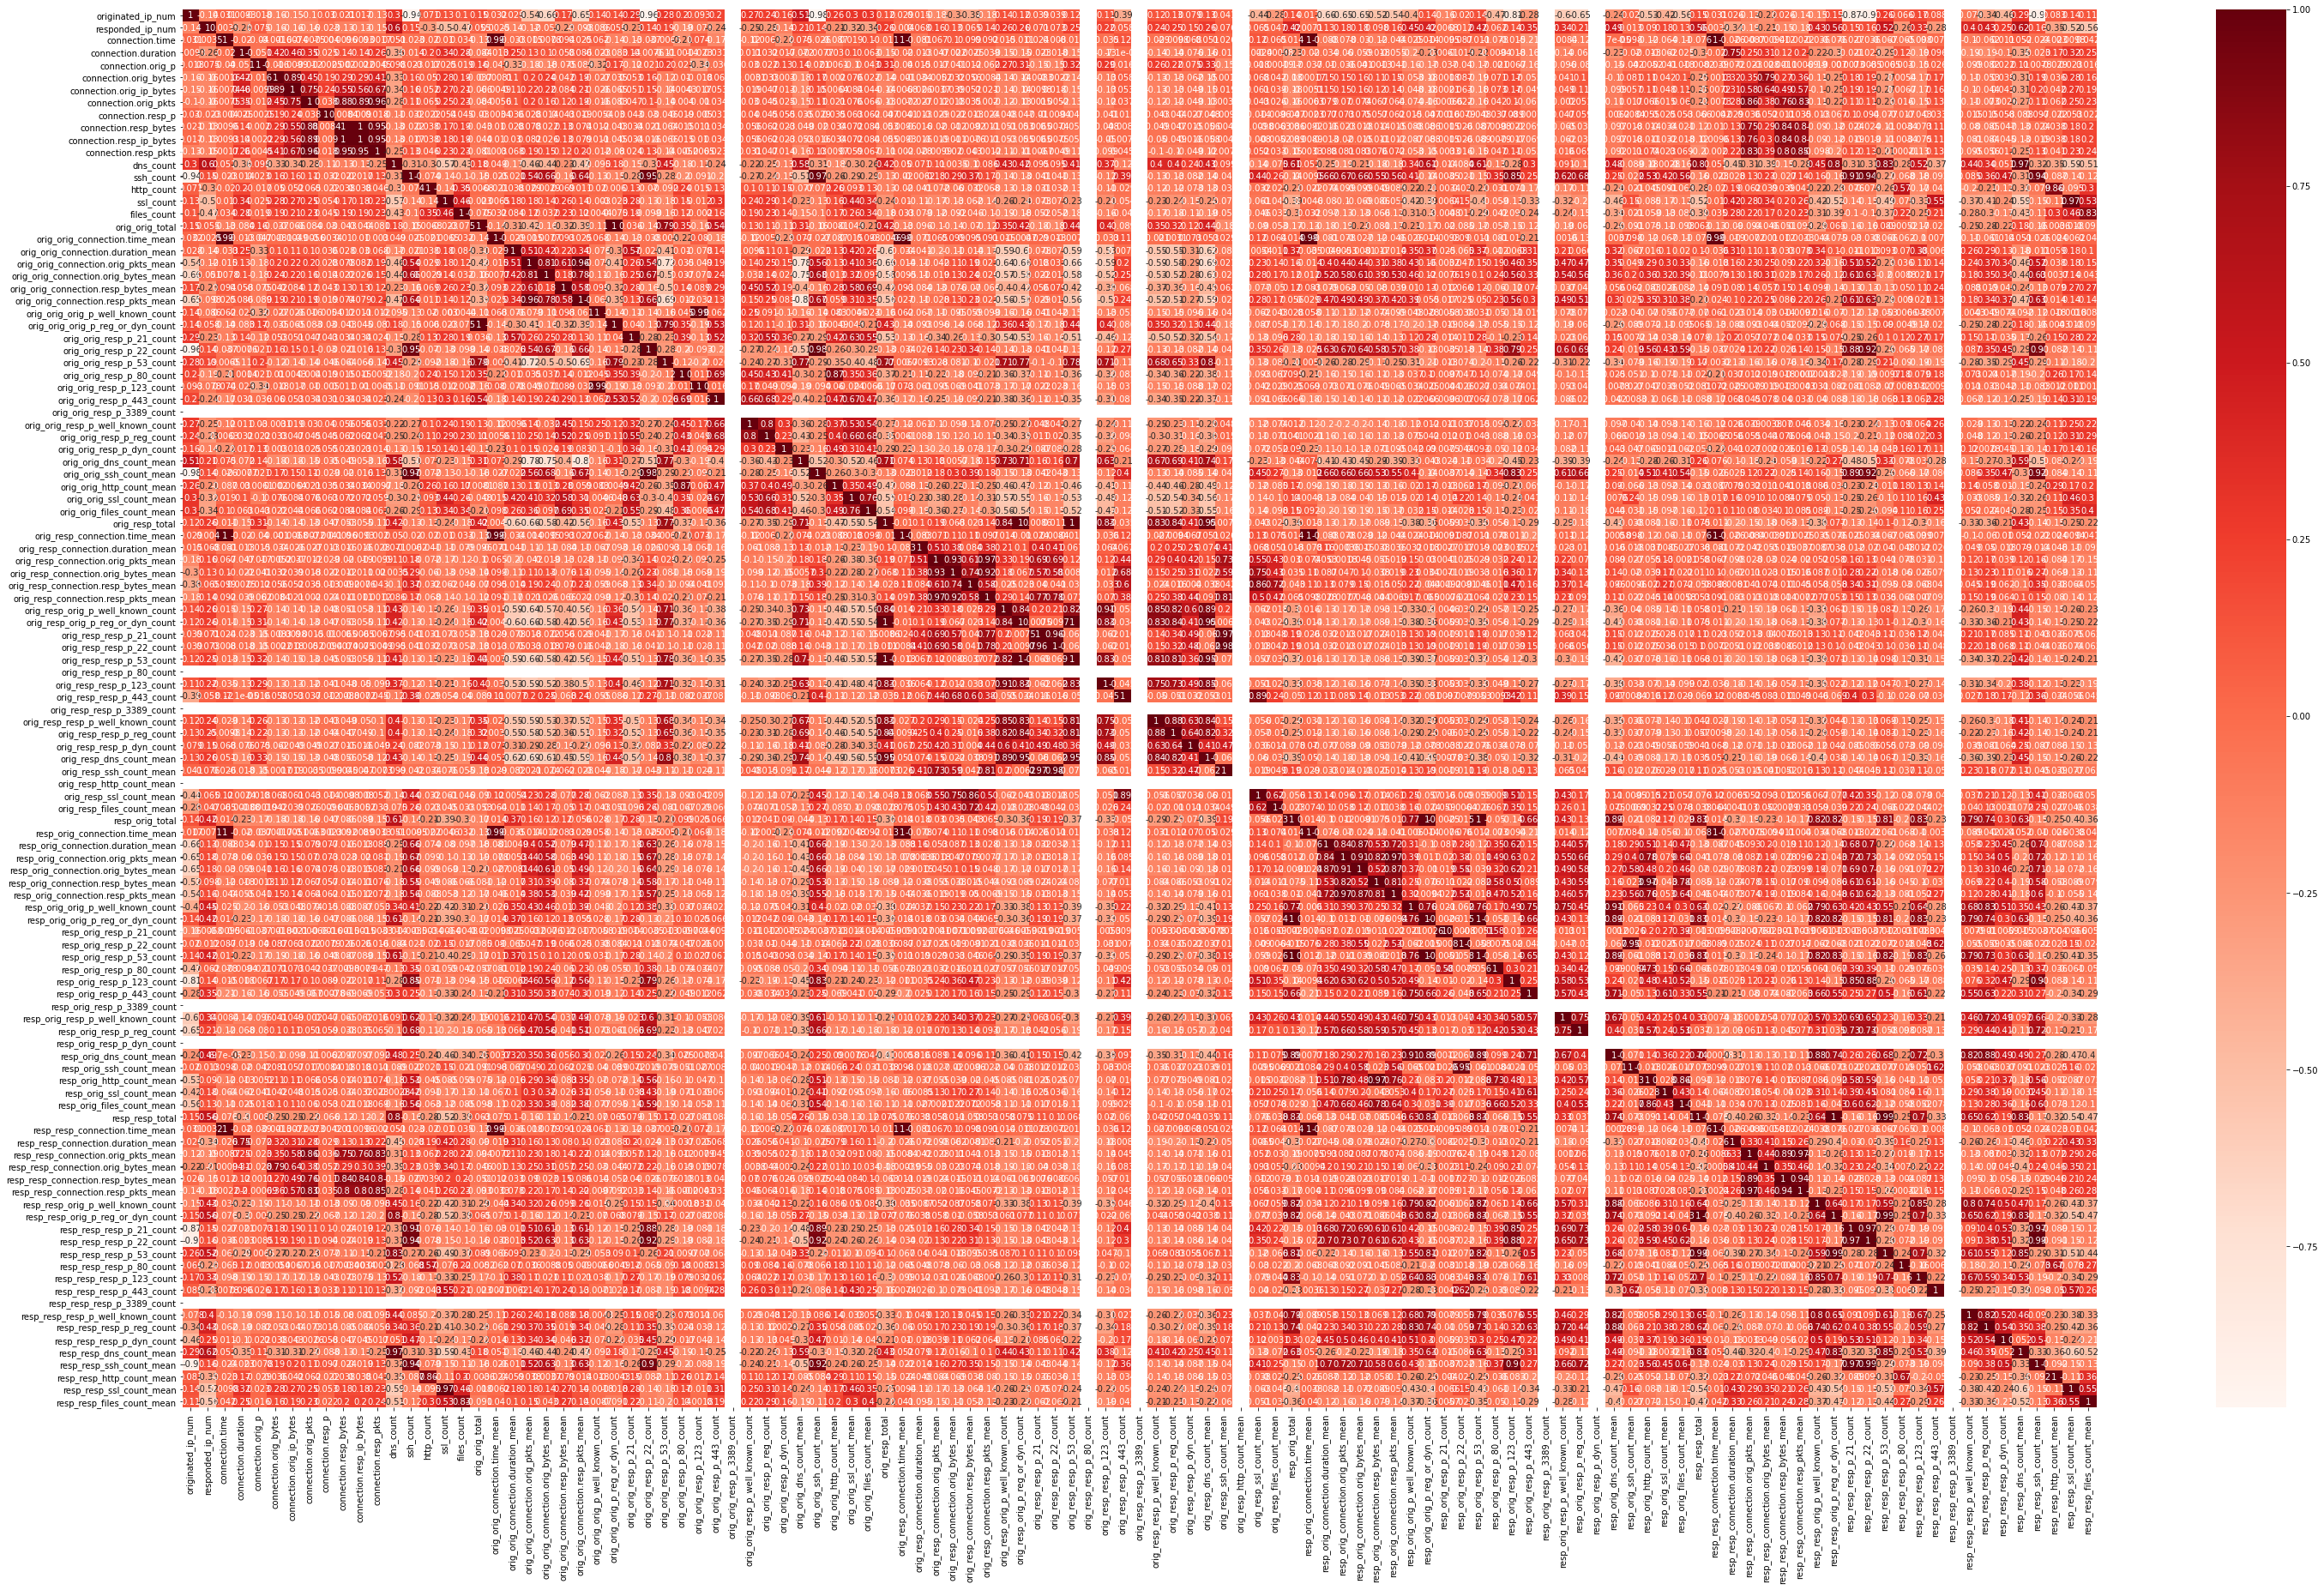

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.856854         0.776106   
1               1.000000          0.856854         0.855039   
2               1.000000          0.766389         0.166415   
3               1.000000          0.766389         0.167038   
4               1.000000          0.215988         0.544111   
...                  ...               ...              ...   
18597           0.840002          0.856854         0.415740   
18598           0.840002          0.856854         0.419105   
18599           0.840002          0.856854         0.428162   
18600           0.840002          0.856854         0.432200   
18601           0.840002          0.856854         0.456048   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000045           0.940238               0.012453   
1                 0.000104           0.940956               0.000881   
2                 0.000099           0.928808               0.006897   
3                 0.000204           0.928915               0.017028   
4                 0.000196           0.937995               0.008719   
...                    ...                ...                    ...   
18597             0.007229           0.778565               0.020101   
18598             0.007387           0.778687               0.020101   
18599             0.007331           0.779053               0.020101   
18600             0.006356           0.779297               0.020101   
18601             0.007086           0.780426               0.020101   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.036053              0.035135           0.002147   
1                      0.014322              0.024324           0.000284   
2                      0.008799              0.007432           0.006948   
3                      0.021545              0.018243           0.006948   
4                      0.014011              0.014865           0.006948   
...                         ...                   ...                ...   
18597                  0.021842              0.014865           0.000300   
18598                  0.021842              0.014865           0.000300   
18599                  0.021842              0.014865           0.000300   
18600                  0.021842              0.014865           0.000300   
18601                  0.021842              0.014865           0.000300   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000461                  0.001381              0.015392   
1                   0.000063                  0.000542              0.013468   
2                   0.000388                  0.000472              0.002886   
3                   0.014279                  0.014618              0.019721   
4                   0.012243                  0.012472              0.014911   
...                      ...                       ...                   ...   
18597               0.000794                  0.001268              0.015873   
18598               0.000794                  0.001268              0.015873   
18599               0.000794                  0.001268              0.015873   
18600               0.000794                  0.001268              0.015873   
18601               0.000794                  0.001268              0.015873   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0        0.000   
1            0.0        0.0         0.0        0.0        0.000   
2            0.0        0.0         0.0        1.0        0.000   
3            0.0        0.0         0.0        1.0        0.000   
4            0.0        0.0         0.0        1.0        0.125   
...          ...        ...         ...        ...          ...   
18597        0.0        1.0         0.0   

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)